In [72]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [73]:
df = pd.read_csv('rai.csv')

## Analyze Hasni's data

In [74]:
df = df[df.main_artist == 'Cheb Hasni']
# Drop duplicates based on duration 
df = df.drop_duplicates(subset=['duration_ms_x'], keep='first')
df.to_csv('hasni.csv')
df.shape

(149, 19)

<AxesSubplot:xlabel='popularity', ylabel='Count'>

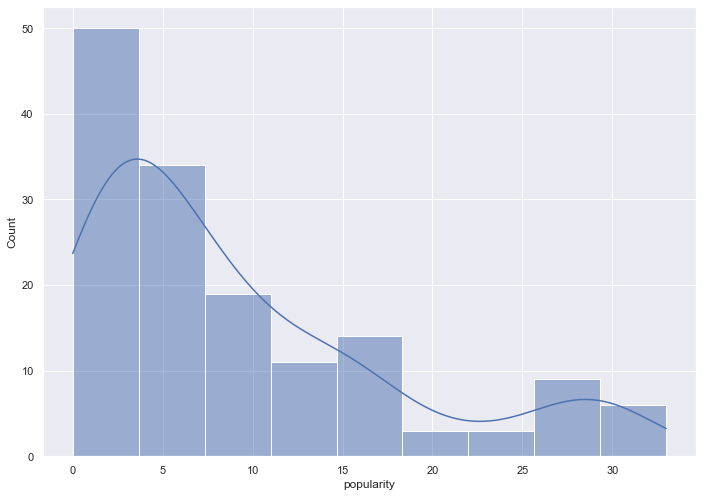

In [75]:
sns.histplot(data=df, x="popularity", kde=True)


## Compare with other datasets

In [76]:
pop_df = pd.read_csv('pop.csv')
frames = [df, pop_df]
df = pd.concat(frames)
df.head()

,id,name,main_artist,key,mode,time_signature,duration_ms_x,danceability,loudness,energy,instrumentalness,liveness,valence,speechiness,tempo,popularity,youtube_views,last_fm_playcount,last_fm_listeners
21,4ySr4rg9X0xzINLADM8kG7,Abla aliya,Cheb Hasni,11,1,3,344720,0.520,-11.206,0.563,0.081700,0.0495,0.929,0.0945,82.185,33,1094.0,119,55
28,51LVU7Mo03RjULFVzb8agq,Ana malit,Cheb Hasni,11,0,4,310800,0.674,-6.903,0.491,0.002110,0.1380,0.501,0.0327,153.685,30,161440.0,102,49
29,37mRDrNeFPfO73oVn4hjUb,داك المحكوم,Cheb Hasni,7,1,3,364893,0.433,-3.859,0.836,0.000109,0.0759,0.892,0.1120,176.900,30,1459.0,115,27
31,7ta0S4V2m8ap7SUoS9crL4,Omri omri,Cheb Hasni,1,1,4,358280,0.351,-2.648,0.873,0.000000,0.1560,0.777,0.0509,159.591,30,453289.0,369,121
32,6wMBzbhfXchwjt65PSEowh,Aalach et loumouny,Cheb Hasni,6,0,4,337826,0.570,-15.486,0.398,0.020400,0.0606,0.619,0.0484,91.885,30,74.0,45,25


<AxesSubplot:xlabel='popularity', ylabel='Count'>

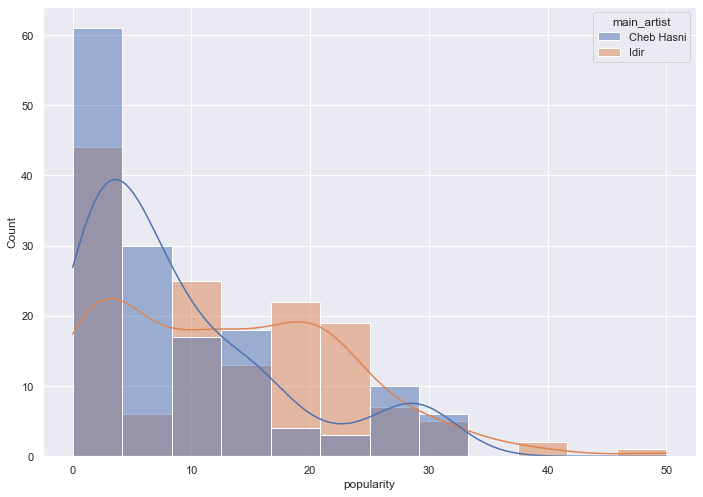

In [77]:
df = df[df.main_artist.isin(['Idir', 'Cheb Hasni'])]
sns.histplot(data=df, x="popularity", hue='main_artist', kde=True)